Import Necessary packages and files

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# file import
df = pd.read_csv('coffee.csv')
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


Data Preparation and cleaning

In [ ]:
df.isnull().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

In [ ]:
# Region checks out
df.Region.unique()

array(['C', 'J', 'F', 'B', 'A', 'E', 'D', 'G', 'I', 'H'], dtype=object)

In [ ]:
# Place name checks out
df["Place name"].duplicated().sum()

13

In [ ]:
# valid
df["Place type"].value_counts()

Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64

In [ ]:
df["Place type"].unique()

array(['Others', 'Cafe', 'Coffee shop', 'Espresso bar'], dtype=object)

In [ ]:
# replace NaN with 0
df["Rating"] = df["Rating"].fillna(0)

In [ ]:
# Valid
df.Rating.isnull().sum()

0

In [ ]:
median = df.Reviews.median()

In [ ]:
# Reviews valid
df["Reviews"] = df["Reviews"].fillna(median)
df["Reviews"].isnull().sum()

0

In [ ]:
# valid
df["Price"].unique()

array(['$$', '$', '$$$'], dtype=object)

In [ ]:
df["Delivery option"].value_counts()

False    165
True      35
Name: Delivery option, dtype: int64

In [ ]:
df["Dine in option"].isnull().sum()

60

In [ ]:
df["Dine in option"] = df["Dine in option"].replace(np.nan, 'False')
df["Dine in option"]. value_counts()

True     140
False     60
Name: Dine in option, dtype: int64

In [ ]:
df["Takeout option"] = df["Takeout option"].replace(np.nan, 'False')
df["Takeout option"]. value_counts()

True     144
False     56
Name: Takeout option, dtype: int64

remove outliers

seventy_fifth = df["Reviews"].quantile(0.75)
twenty_fifth = df["Reviews"].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
print(iqr)
upper = seventy_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)
print(upper, lower)
no_outiers = df[(df["Reviews"] < upper) & (df["Reviews"] > lower)]
sns.distplot(no_outiers["Reviews"])

In [ ]:
seventy_fifth = df["Reviews"].quantile(0.75)
twenty_fifth = df["Reviews"].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
print(iqr)
upper = seventy_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)
print(upper, lower)
df = df[(df["Reviews"] < upper) & (df["Reviews"] > lower)]

603.0
1547.5 -864.5


In [ ]:
df[["Rating", "Reviews"]].describe()

,Rating,Reviews
count,180.000000,180.000000
mean,4.615556,365.555556
std,0.541137,404.982364
min,0.000000,3.000000
25%,4.500000,39.750000
50%,4.700000,201.000000
75%,4.825000,573.500000
max,5.000000,1529.000000


Data Visualization

How many stores were given each rating

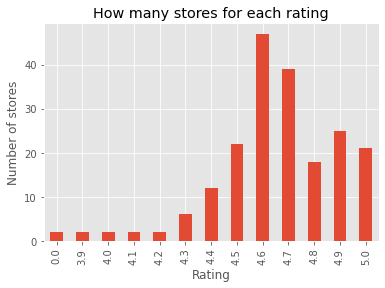

In [ ]:
gp = df.groupby('Rating')['Place name'].count()
gp.plot(kind='bar', ylabel='Number of stores', title='How many stores for each rating')

2. State which category has the most number of observations

Text(0.5, 1.0, 'Delivery option')

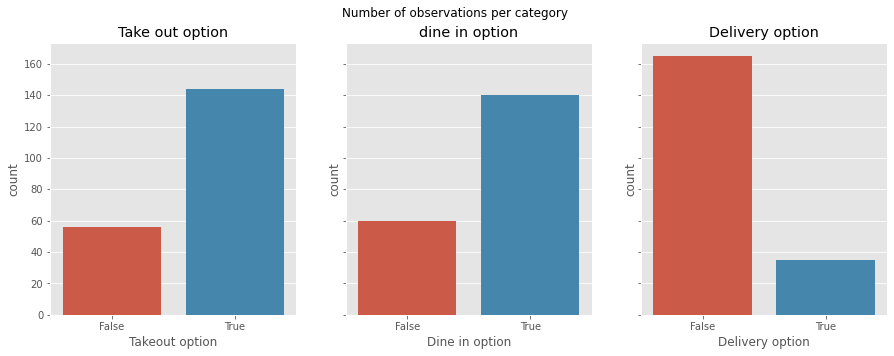

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Number of observations per category')

# Take out option
sns.countplot(ax=axes[0], x=df["Takeout option"])
axes[0].set_title('Take out option')

# Dine in option
sns.countplot(ax=axes[1], x=df["Dine in option"])
axes[1].set_title('dine in option')

# Delivery option
sns.countplot(ax=axes[2], x=df["Delivery option"])
axes[2].set_title('Delivery option')


3. Describe the distribution of the number of reviews. Your answer must include a
visualization that shows the distribution.

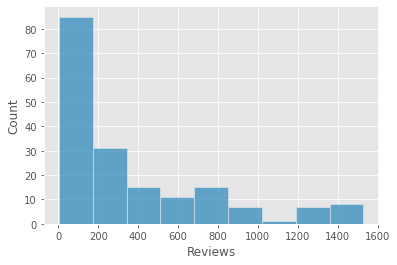

In [ ]:
sns.histplot(df["Reviews"])
plt.show()

4. Describe the relationship between number of reviews and rating. Your answer must
include a visualization to demonstrate the relationship.

In [ ]:
df.corr()

,Rating,Reviews,Delivery option
Rating,1.000000,-0.127482,0.026227
Reviews,-0.127482,1.000000,0.220058
Delivery option,0.026227,0.220058,1.000000


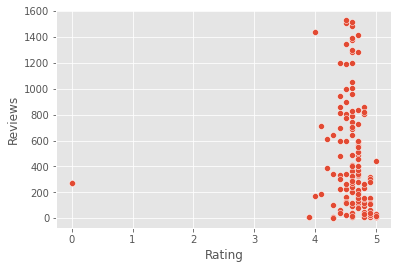

In [ ]:
sns.scatterplot(x="Rating", y="Reviews", data=df)

5. The business wants to predict the number of reviews a store will get using the data
provided. State the type of machine learning problem that this is
(regression/classification/clustering).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
X = 